In [4]:
import logging
logging.basicConfig(level=logging.INFO)
import matplotlib.pyplot as plt
import atlite

outdir = 'output/'

## MERRA2

In [5]:
## Load cutout
# if already created, should just return reference to that folder
cutout = atlite.Cutout(name="merra2-europe-sub2-2011-01",
                       module="merra2",
                       xs=slice(30, 41.56244222),
                        ys=slice(33.56459975, 35),
                       years=slice(2011, 2011),
                       months=slice(1,1,1) )

KeyboardInterrupt: 

In [3]:
cutout.prepare(overwrite=True)

INFO:atlite.preparation:Starting preparation of cutout 'merra2-europe-sub2-2011-01'
INFO:atlite.datasets.merra2:MultiIndex([(2011, 1)],
           names=['year', 'month'])
INFO:atlite.datasets.merra2:[(2011, 1, 1), (2011, 1, 2), (2011, 1, 3), (2011, 1, 4), (2011, 1, 5), (2011, 1, 6), (2011, 1, 7), (2011, 1, 8), (2011, 1, 9), (2011, 1, 10), (2011, 1, 11), (2011, 1, 12), (2011, 1, 13), (2011, 1, 14), (2011, 1, 15), (2011, 1, 16), (2011, 1, 17), (2011, 1, 18), (2011, 1, 19), (2011, 1, 20), (2011, 1, 21), (2011, 1, 22), (2011, 1, 23), (2011, 1, 24), (2011, 1, 25), (2011, 1, 26), (2011, 1, 27), (2011, 1, 28), (2011, 1, 29), (2011, 1, 30), (2011, 1, 31)]
INFO:atlite.preparation:31 tasks have been collected. Starting running them on all processors.
INFO:atlite.datasets.merra2:Opening `/Users/michd/Documents/GEODATA/data/merra2/2011/01/MERRA2_400.tavg1_2d_flx_Nx.20110101.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Documents/GEODATA/data/merra2/2011/01/MERRA2_400.tavg1_2d_flx_Nx.2011

KeyboardInterrupt: 

In [4]:
cutout.meta.coords

Coordinates:
  * y           (y) float64 34.0 34.5 35.0
  * x           (x) float64 30.0 30.62 31.25 31.88 ... 39.38 40.0 40.62 41.25
  * time        (time) datetime64[ns] 2011-01-01T00:30:00 ... 2011-01-02T23:30:00
    lon         (x) float64 30.0 30.62 31.25 31.88 ... 39.38 40.0 40.62 41.25
    lat         (y) float64 34.0 34.5 35.0
  * year-month  (year-month) MultiIndex
  - year        (year-month) int64 2011
  - month       (year-month) int64 1

## ERA5

In [2]:
## Load cutout
# if already created, should just return reference to that folder
cutout = atlite.Cutout(name="europe-sub2-2011-01",
                       module="era5",
                       xs=slice(30, 41.56244222),
                       ys=slice(35, 33.56459975),
                       years=slice(2011, 2011),
                       months=slice(1,1,1) )

INFO:atlite.cutout:All cutout (europe-sub2-2011-01, /Users/michd/Research/GEODATA/data/cutouts) files available.
INFO:atlite.preparation:[4, 1, 1, 10]
INFO:atlite.cutout:Cutout subset prepared: <Cutout europe-sub2-2011-01 x=30.00-41.50 y=35.00-33.75 time=2011/1-2011/1 prepared>


## Convert wind

In [7]:
## Wind profiles
# call: wind(cutout, turbine, smooth=False, **params)
#	.. cutout.convert_and_aggregate(convert_func=convert_wind, turbine=turbine,**params)
# Returns xr.DataArray
ds = atlite.convert.wind(cutout, turbine='Suzlon_S82_1.5_MW', smooth=True, var_height='lml')

INFO:atlite.wind:Data variables:
    tlml       (time, y, x) float32 ...
    eflux      (time, y, x) float32 ...
    ustar      (time, y, x) float32 ...
    tstar      (time, y, x) float32 ...
    vlml       (time, y, x) float32 ...
    hflux      (time, y, x) float32 ...
    hlml       (time, y, x) float32 ...
    ulml       (time, y, x) float32 ...
    roughness  (time, y, x) float32 0.0003335408 0.00030981816 ... 0.0119602615
    pblh       (time, y, x) float32 ...
    disph      (time, y, x) float32 ...
    rhoa       (time, y, x) float32 ...
    wndlml     (time, y, x) float32 ...
INFO:atlite.convert:Keeping time dimension.


('time', 'y', 'x')

## Saving and plotting

In [8]:
# Pandas and save to csv
df = ds.to_dataframe(name='power')
df.to_csv(outdir + 'merra2_wind_test_sm.csv')
df.reset_index(level=df.index.names, inplace=True)

In [19]:
df.head()

,time,y,x,lat,lon,power
0,2011-01-01 00:30:00,34.0,30.000,34.0,30.000,0.382479
1,2011-01-01 00:30:00,34.0,30.625,34.0,30.625,0.345861
2,2011-01-01 00:30:00,34.0,31.250,34.0,31.250,0.324215
3,2011-01-01 00:30:00,34.0,31.875,34.0,31.875,0.309110
4,2011-01-01 00:30:00,34.0,32.500,34.0,32.500,0.218463


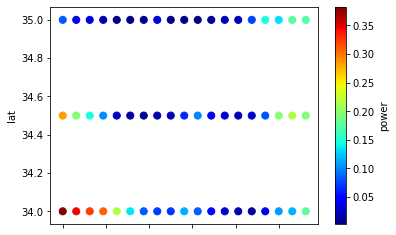

In [20]:
# Plot
df[df.time == '2011-01-01 00:30:00'].plot.scatter(x='lon', y='lat', c='power',s=50,  cmap='jet')
plt.show()

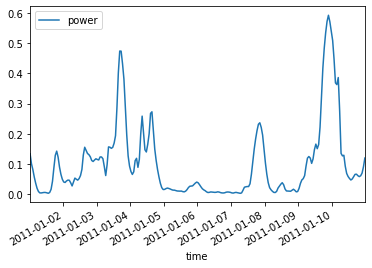

In [9]:
# Plot
df[(df.lat == 35) & (df.lon == 40)].plot(x='time', y='power')
plt.show()

## Playing with nc files

In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [14]:
x = xr.open_dataset('/Users/michd/Documents/GEODATA/data/merra2/2011/01/MERRA2_400.tavg1_2d_flx_Nx.20110118.nc4')
x

<xarray.Dataset>
Dimensions:  (lat: 361, lon: 576, time: 24)
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * time     (time) datetime64[ns] 2011-01-18T00:30:00 ... 2011-01-18T23:30:00
Data variables:
    tlml     (time, lat, lon) float32 ...
    eflux    (time, lat, lon) float32 ...
    ustar    (time, lat, lon) float32 ...
    tstar    (time, lat, lon) float32 ...
    vlml     (time, lat, lon) float32 ...
    hflux    (time, lat, lon) float32 ...
    hlml     (time, lat, lon) float32 ...
    ulml     (time, lat, lon) float32 ...
    z0m      (time, lat, lon) float32 ...
    pblh     (time, lat, lon) float32 ...
    disph    (time, lat, lon) float32 ...
    rhoa     (time, lat, lon) float32 ...
Attributes:
    History:                           Original file generated: Sat Jun 14 00...
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2

In [15]:
x.close()

In [6]:
ds = xr.open_dataset('/Users/michd/Research/GEODATA/data/cutouts/merra2-europe-sub2-2011-01/201101.nc')
ds.coords

Coordinates:
    lat      (y) float64 ...
    lon      (x) float64 ...
  * x        (x) float64 30.0 30.62 31.25 31.88 32.5 ... 39.38 40.0 40.62 41.25
  * y        (y) float64 34.0 34.5 35.0
  * time     (time) datetime64[ns] 2011-01-01T00:30:00 ... 2011-01-02T23:30:00

In [20]:
ds['hlml'].attrs

{'long_name': 'surface_layer_height\nheight=lmlheight=lml, height=lml',
 'units': 'm',
 'fmissing_value': 1000000000000000.0,
 'standard_name': 'surface_layer_height',
 'vmax': 1000000000000000.0,
 'vmin': -1000000000000000.0,
 'valid_range': array([-1.e+15,  1.e+15], dtype=float32)}

In [5]:
df = ds.to_dataframe()
df.reset_index(level=df.index.names, inplace=True)

In [8]:
df.head()

,time,x,y,lon,lat,rhoa,tlml,ulml,tstar,hflux,ustar,disph,vlml,eflux,hlml,pblh,roughness,wndlml
0,2011-01-01 00:30:00,30.000,34.0,30.000,34.0,1.229721,287.149048,6.791270,0.119368,45.711918,0.309788,0.0,-4.656317,212.649811,63.736580,1275.323364,0.000334,8.234236
1,2011-01-01 00:30:00,30.000,34.5,30.000,34.5,1.229599,287.133423,6.248302,0.107679,36.860355,0.275975,0.0,-4.024481,189.837311,63.722908,1294.823364,0.000274,7.432208
2,2011-01-01 00:30:00,30.000,35.0,30.000,35.0,1.226425,287.758423,4.089122,0.093672,21.696293,0.184971,0.0,-2.882879,135.149811,63.859627,1513.323364,0.000148,5.003190
3,2011-01-01 00:30:00,30.625,34.0,30.625,34.0,1.227280,287.570923,6.961192,0.111341,40.883793,0.297093,0.0,-3.819403,205.337311,63.834236,1355.323364,0.000310,7.940154
4,2011-01-01 00:30:00,30.625,34.5,30.625,34.5,1.225449,287.867798,5.472911,0.092390,27.799809,0.242466,0.0,-3.646551,164.712311,63.900642,1415.823364,0.000217,6.576480


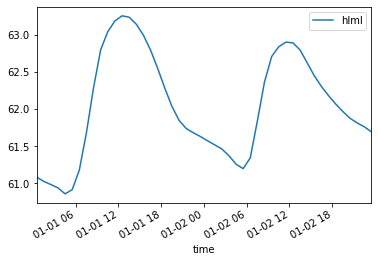

In [11]:
# Plot
df[(df.lat == 35) & (df.lon == 40)].plot(x='time', y='hlml')
plt.show()

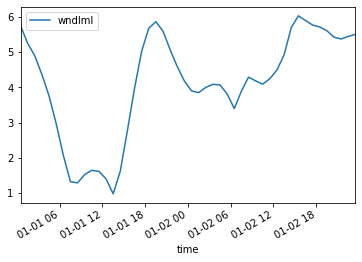

In [12]:
df[(df.lat == 35) & (df.lon == 40)].plot(x='time', y='wndlml')
plt.show()

In [55]:
yds = yd.where((yd.y >= y0) & (yd.y <= yf), drop=True)

In [8]:
yds.dims

NameError: name 'yds' is not defined

In [13]:
merra2_dir = '/Users/michd/Documents/GEODATA/data/merra2'
f = '201101/MERRA2_400.tavg1_2d_flx_Nx.20110101.nc4'
fn = merra2_dir + '/' + f
ds = xr.open_dataset(fn)

In [33]:
ds = xr.open_dataset(xf)

In [34]:
ds.dims

Frozen(SortedKeysDict({'time': 24, 'lat': 361, 'lon': 576}))

In [35]:
ds.coords

Coordinates:
  * time     (time) datetime64[ns] 2011-01-01T00:30:00 ... 2011-01-01T23:30:00
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4

In [36]:
y=list(ds.data_vars)
y

['rhoa',
 'tlml',
 'hlml',
 'pblh',
 'ulml',
 'disph',
 'tstar',
 'vlml',
 'ustar',
 'hflux',
 'z0m']

In [23]:
var_rename = dict((v, v.lower()) for v in list(ds.data_vars))
ds = ds.rename(var_rename)

In [25]:
vars = ['rhoa','ulml']
ds2 = ds[vars]
ds2.data_vars

Data variables:
    rhoa     (time, lat, lon) float32 ...
    ulml     (time, lat, lon) float32 ...

## Misc

In [18]:
from calendar import monthrange

In [33]:
years=slice(2011, 2012)
months=slice(1,2,1)

In [47]:
step = years.step if years.step else 1
yrs = range(years.start, years.stop+step, step)
step = months.step if months.step else 1
mos = range(months.start, months.stop+step, step)

In [49]:
tu = [(yr,mo,monthrange(yr,mo)[1]) for yr in yrs for mo in mos]

In [30]:
import glob, os

In [53]:
if not glob.glob('*.p'):
    print('no matching files')

no matching files


In [61]:
import os, six
weather_data_config = {
#	Single file contains all wind variables (≠ ncep)
# 	https://goldsmr4.gesdisc.eosdis.nasa.gov/data/MERRA2/M2T1NXFLX.5.12.4/2015/01/MERRA2_400.tavg1_2d_flx_Nx.20150101.nc4
	'surface_flux': dict(tasks_func='tasks_monthly_merra2',
						  prepare_func='prepare_month_surface_flux',
						  template=os.path.join('merra2_dir', '{year}{month:0>2}/MERRA2_400.tavg1_2d_flx_Nx.*.nc4'),
						url = 'https://goldsmr4.gesdisc.eosdis.nasa.gov/data/MERRA2/M2T1NXFLX.5.12.4/{year}/{month:0>2}/MERRA2_400.tavg1_2d_flx_Nx.{year}{month:0>2}{day:0>2}.nc4',
						fn = '{year}{month:0>2}/MERRA2_400.tavg1_2d_flx_Nx.{year}{month:0>2}{day:0>2}.nc4')
#	TODO: solar radiation data
}

In [63]:
for k, v in six.iteritems(weather_data_config):
    print(k)
    [print(v2) for v2 in v]

surface_flux
tasks_func
prepare_func
template
url
fn


In [26]:
savedFiles = [('surface_flux', '/Users/michd/Documents/GEODATA/data/merra2/201101/MERRA2_400.tavg1_2d_flx_Nx.20110101.nc4')]

In [28]:
for d, f in savedFiles:
    print(d)
    print(f)

surface_flux
/Users/michd/Documents/GEODATA/data/merra2/201101/MERRA2_400.tavg1_2d_flx_Nx.20110101.nc4


In [32]:
xf = os.path.join(os.path.dirname(f),'trim/',os.path.split(f)[1])